In [104]:
import os
import pandas as pd
import time

In [105]:
folderPath = '/Users/huangweichen/Desktop/job/qsearch/problem3/pull_data/data'
dfs = []
order = ['fetchDataTime', 'id', 'createTime', 'collectCount', 'commentCount', 'diggCount', 'playCount', 'delta_playCount', 'shareCount', 'desc']

In [106]:
for fileName in os.listdir(folderPath):
    if fileName.endswith('.csv'):
        filePath = os.path.join(folderPath, fileName)
        df = pd.read_csv(filePath)
    
        df['id'] = df['createTime'] # only for current data w/o id
        df['fetchDataTime'] =  time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(int(fileName[:-4])))
        # df['createTime'] = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(df['createTime']))
        
        dfs.append(df)
        
combinedDf = pd.concat(dfs, ignore_index=True)
combinedDf = combinedDf.sort_values(by=['id', 'fetchDataTime'])
combinedDf['delta_playCount'] = combinedDf.groupby('id')['playCount'].diff().fillna(0).astype(int)
combinedDf = combinedDf.sort_values(by=['playCount', 'id', 'fetchDataTime'], ascending=False)
combinedDf = combinedDf[order]

In [160]:
iddf = combinedDf
iddf['colors'] = iddf.groupby('id').ngroup()
iddf = iddf[['id', 'colors']]

print(iddf.to_string(index=False))

        id  colors
1706572800       1
1706572800       1
1706572800       1
1706572800       1
1706572800       1
1706536800       0
1706536800       0
1706536800       0
1706536800       0
1706536800       0
1706580000       2
1706580000       2
1706580000       2
1706580000       2
1706580000       2


In [141]:
dfPlot = combinedDf
totalId = len(dfPlot['id'].unique())

idx = 0
for id_value in dfPlot['id'].unique():
    print(id_value)
    dfPlot[:][dfPlot['id'] == id_value].insert(0, 'color', idx)
    idx += 1

print(dfPlot)

1706572800
1706536800
1706580000
         fetchDataTime          id  createTime  collectCount  commentCount  \
10 2024-01-30 02:48:06  1706572800  1706572800            11             6   
1  2024-01-30 02:46:06  1706572800  1706572800            11             6   
13 2024-01-30 02:44:06  1706572800  1706572800            11             6   
7  2024-01-30 02:42:08  1706572800  1706572800            11             6   
4  2024-01-30 02:40:07  1706572800  1706572800            11             6   
11 2024-01-30 02:48:06  1706536800  1706536800             5             0   
2  2024-01-30 02:46:06  1706536800  1706536800             5             0   
14 2024-01-30 02:44:06  1706536800  1706536800             5             0   
8  2024-01-30 02:42:08  1706536800  1706536800             5             0   
5  2024-01-30 02:40:07  1706536800  1706536800             5             0   
9  2024-01-30 02:48:06  1706580000  1706580000             1             1   
0  2024-01-30 02:46:06  1706580

In [108]:
from IPython.display import display

print(combinedDf.to_string(index=False))

      fetchDataTime         id  createTime  collectCount  commentCount  diggCount  playCount  delta_playCount  shareCount                                                                                                                                                                                                                                 desc
2024-01-30 02:48:06 1706572800  1706572800            11             6        266      16900              300          14                                                                                                                                                                                                              這個鬼蹭...我到底看了什麼 #即新聞 #小偷
2024-01-30 02:46:06 1706572800  1706572800            11             6        260      16600              300          13                                                                                                                                                                                 

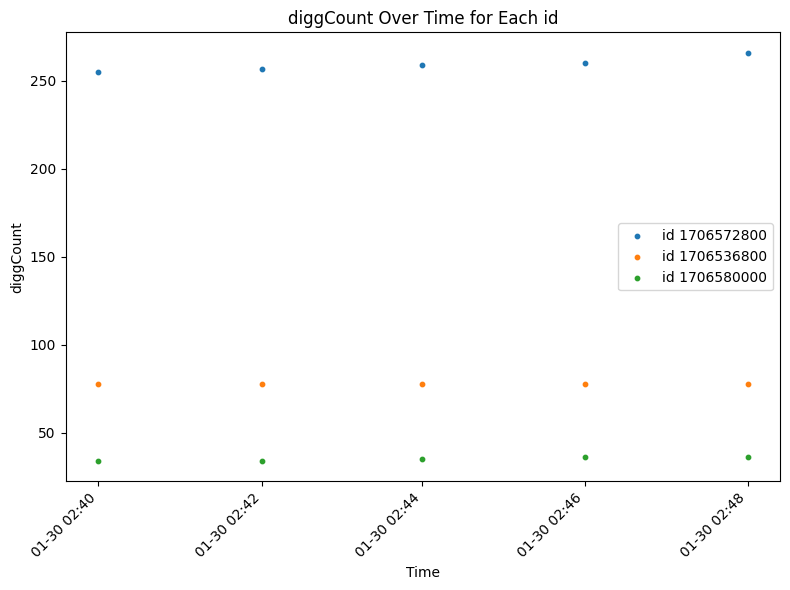

In [109]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size for better resolution

df = combinedDf
df['fetchDataTime'] = pd.to_datetime(df['fetchDataTime'])

for id_value in df['id'].unique():
    subset = df[df['id'] == id_value]
    
    ax.scatter(subset['fetchDataTime'], subset['diggCount'], label=f'id {id_value}', s=10)

# Customize the plot appearance
ax.set_xlabel('Time')
ax.set_ylabel('diggCount')
ax.set_title('diggCount Over Time for Each id')
ax.legend()
ax.set_xticks(df['fetchDataTime'].unique())
date_format = DateFormatter("%m-%d %H:%M")  # Adjust the date format as needed
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('diggCount')
plt.title('diggCount Over Time for Each id')
plt.tight_layout()  # Adjust layout for better spacing
plt.legend()
plt.show()

In [110]:
import plotly.express as px

dfScatter = combinedDf

# Assuming your DataFrame is named 'df'
fig = px.scatter(dfScatter, x='fetchDataTime', y='diggCount', color='id',
                 labels={'diggCount': 'Digg Count', 'fetchDataTime': 'Fetch Data Time'},
                 title='Digg Count Over Time for Each ID')

# Customize layout if needed
fig.update_layout(
    xaxis_title='Fetch Data Time',
    yaxis_title='Digg Count',
    legend_title='ID',
    font=dict(family='Arial', size=12, color='black'),
    title=dict(x=0.5, xanchor='center', font=dict(size=16)),
)

# Show the plot
fig.show()

In [138]:
import plotly.graph_objects as go
import numpy as np

dfPlot = combinedDf

# Assuming your DataFrame is named 'df'
fig = go.Figure()

# Iterate over unique IDs and add a trace for each
for id_value in dfPlot['id'].unique():
    id_data = dfPlot[dfPlot['id'] == id_value]
    print(id_data)
    fig.add_trace(go.Scatter(x=id_data['fetchDataTime'], y=id_data['playCount'],
                             mode='lines+markers', name=f'Video ID: {id_value}',
                             marker=dict(
                                color=(1, 0, 0)
                             ),
                             hovertemplate="<br>".join([
                                "<b>Video ID: %{customdata[0]}</b>",
                                "Date: %{x}",
                                "Count: %{y}",
                                "Delta: %{customdata[1]}",
                                "<extra></extra>"
                            ])))

# Customize layout
fig.update_layout(
    xaxis_title='Fetch Data Time',
    yaxis_title='Play Count',
    title='Play Count Over Time for Each ID',
    hoverlabel=dict(
        bgcolor="white",
        font_size=10,
    ),
    hovermode="x unified"
)

# Show the plot
fig.show()


         fetchDataTime          id  createTime  collectCount  commentCount  \
10 2024-01-30 02:48:06  1706572800  1706572800            11             6   
1  2024-01-30 02:46:06  1706572800  1706572800            11             6   
13 2024-01-30 02:44:06  1706572800  1706572800            11             6   
7  2024-01-30 02:42:08  1706572800  1706572800            11             6   
4  2024-01-30 02:40:07  1706572800  1706572800            11             6   

    diggCount  playCount  delta_playCount  shareCount                     desc  
10        266      16900              300          14  這個鬼蹭...我到底看了什麼 #即新聞 #小偷  
1         260      16600              300          13  這個鬼蹭...我到底看了什麼 #即新聞 #小偷  
13        259      16300              300          12  這個鬼蹭...我到底看了什麼 #即新聞 #小偷  
7         257      16000              300          11  這個鬼蹭...我到底看了什麼 #即新聞 #小偷  
4         255      15700                0          11  這個鬼蹭...我到底看了什麼 #即新聞 #小偷  
         fetchDataTime          id  createTim

In [167]:
print(['rgb({},{},{})'.format(r,g,b) for r,g,b in zip([2], [1], [0])])
print(['rgb({},{},{})'.format(r,g,b) for r,g,b in [2,1,0] ])

['rgb(2,1,0)']


TypeError: cannot unpack non-iterable int object